In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib
from sqlalchemy import create_engine
import scipy.stats as st
from scipy.stats import linregress

Using matplotlib backend: MacOSX


In [3]:
#import freedom
freedom_file = pd.read_csv("freedom.csv")
list(freedom_file.columns)
#pf_expression, Freedom of expression
#ef_legal_protection,Protection of property rights
#ef_legal_integrity, Integrity of the legal system
#pf_identity_sex, Same-sex ralitionships
#pf_religion, Religious freedom
#pf_association_assembly, Freedom of assembly
#ef_trade_movement_visit, Freedom of foreigners to visit
#ef_legal_military, Military interference in rule of law and politics
#ef_money_inflation, Inflation: most recent year
freedom = freedom_file.drop(columns=[
 'hf_score',
 'hf_rank',
 'hf_quartile',
 'pf_rol_procedural',
 'pf_rol_civil',
 'pf_rol_criminal',
 'pf_rol',
 'pf_ss_homicide',
 'pf_ss_disappearances_disap',
 'pf_ss_disappearances_violent',
 'pf_ss_disappearances_organized',
 'pf_ss_disappearances_fatalities',
 'pf_ss_disappearances_injuries',
 'pf_ss_disappearances',
 'pf_ss_women_fgm',
 'pf_ss_women_inheritance_widows',
 'pf_ss_women_inheritance_daughters',
 'pf_ss_women_inheritance',
 'pf_ss_women',
 'pf_ss',
 'pf_movement_domestic',
 'pf_movement_foreign',
 'pf_movement_women',
 'pf_movement',
 'pf_religion_estop_establish',
 'pf_religion_estop_operate',
 'pf_religion_estop',
 'pf_religion_harassment',
 'pf_religion_restrictions',
 'pf_association_association',
 'pf_association_political_establish',
 'pf_association_political_operate',
 'pf_association_political',
 'pf_association_prof_establish',
 'pf_association_prof_operate',
 'pf_association_prof',
 'pf_association_sport_establish',
 'pf_association_sport_operate',
 'pf_association_sport',
 'pf_association',
 'pf_expression_killed',
 'pf_expression_jailed',
 'pf_expression_influence',
 'pf_expression_control',
 'pf_expression_cable',
 'pf_expression_newspapers',
 'pf_expression_internet',
 'pf_identity_legal',
 'pf_identity_sex_male',
 'pf_identity_sex_female',
 'pf_identity_divorce',
 'pf_identity',
 'pf_score',
 'pf_rank',
 'ef_government_consumption',
 'ef_government_transfers',
 'ef_government_enterprises',
 'ef_government_tax_income',
 'ef_government_tax_payroll',
 'ef_government_tax',
 'ef_government_soa',
 'ef_government',
 'ef_legal_judicial',
 'ef_legal_courts',
 'ef_legal_enforcement',
 'ef_legal_restrictions',
 'ef_legal_police',
 'ef_legal_crime',
 'ef_legal_gender',
 'ef_legal',
 'ef_money_growth',
 'ef_money_sd',
 'ef_money_currency',
 'ef_money',
 'ef_trade_tariffs_revenue',
 'ef_trade_tariffs_mean',
 'ef_trade_tariffs_sd',
 'ef_trade_tariffs',
 'ef_trade_regulatory_nontariff',
 'ef_trade_regulatory_compliance',
 'ef_trade_regulatory',
 'ef_trade_black',
 'ef_trade_movement_foreign',
 'ef_trade_movement_capital',
 'ef_trade_movement',
 'ef_trade',
 'ef_regulation_credit_ownership',
 'ef_regulation_credit_private',
 'ef_regulation_credit_interest',
 'ef_regulation_credit',
 'ef_regulation_labor_minwage',
 'ef_regulation_labor_firing',
 'ef_regulation_labor_bargain',
 'ef_regulation_labor_hours',
 'ef_regulation_labor_dismissal',
 'ef_regulation_labor_conscription',
 'ef_regulation_labor',
 'ef_regulation_business_adm',
 'ef_regulation_business_bureaucracy',
 'ef_regulation_business_start',
 'ef_regulation_business_bribes',
 'ef_regulation_business_licensing',
 'ef_regulation_business_compliance',
 'ef_regulation_business',
 'ef_regulation',
 'ef_score',
 'ef_rank'])

#change columns name
freedom_new = freedom.rename(columns={"ISO_code":"code","pf_religion":"religion","pf_association_assembly":"assembly",
                                     "pf_expression":"expression","pf_identity_sex":"same sex",
                                     "ef_legal_protection":"legal protection","ef_legal_military":"military interference",
                                     "ef_legal_integrity":"legal system","ef_money_inflation":"inflation",
                                     "ef_trade_movement_visit":"foreigners visit"})
freedom_new.dtypes
freedom_new.head()

,year,code,countries,region,religion,assembly,expression,same sex,legal protection,military interference,legal system,inflation,foreigners visit
0,2017,ALB,Albania,Eastern Europe,9.2,10,8.6,10,4.6,8.3,4.2,9.6,8.3
1,2017,DZA,Algeria,Middle East & North Africa,4.9,5,7.3,0,4.8,4.2,5,8.9,1.1
2,2017,AGO,Angola,Sub-Saharan Africa,8.8,2.5,6.5,0,3.3,3.3,4.2,3.7,0.1
3,2017,ARG,Argentina,Latin America & the Caribbean,7.8,10,8.7,10,4.4,7.5,3.3,4.9,8
4,2017,ARM,Armenia,Caucasus & Central Asia,6.2,7.5,7.2,10,5.8,5.8,5,9.8,10


In [4]:
#import happiness
happiness_file = pd.read_csv("happiness.csv")
list(happiness_file.columns)
happiness_new = happiness_file.rename(columns={'Entity':"countries",'Code':'code','Year':'year',
                                               'World Happiness Report 2016 (Cantril Ladder (0=worst; 10=best))':'happiness score'})
happiness_new.dtypes
happiness_new.head()

,countries,code,year,happiness score
0,Afghanistan,AFG,2008,3.723590
1,Afghanistan,AFG,2009,4.401778
2,Afghanistan,AFG,2010,4.758381
3,Afghanistan,AFG,2011,3.831719
4,Afghanistan,AFG,2012,3.782938


In [5]:
#merge on'code'
merge_table = pd.merge(happiness_new,freedom_new,how="left",left_on=["code","year"],right_on=["code","year"])
merge_new = merge_table.drop(columns=['countries_y'])

#drop NA
merge_new = merge_new.dropna()
merge_new = merge_new.rename(columns={'countries_x':'countries'})

merge_new 

,countries,code,year,happiness score,region,religion,assembly,expression,same sex,legal protection,military interference,legal system,inflation,foreigners visit
12,Albania,ALB,2009,5.485470,Eastern Europe,9.8,-,7.7,10,3.9,8.3,4.2,9.5,0
13,Albania,ALB,2010,5.268937,Eastern Europe,9.4,-,7.6,10,4,8.3,4.2,9.3,0
14,Albania,ALB,2011,5.867422,Eastern Europe,9.1,10,8.6,10,3.6,8.3,4.2,9.3,0
15,Albania,ALB,2012,5.510124,Eastern Europe,9.3,10,8.7,10,3.1,8.3,4.2,9.6,0
16,Albania,ALB,2013,4.550648,Eastern Europe,9.1,10,8.7,10,3,8.3,4.2,9.6,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,Zimbabwe,ZWE,2013,4.690188,Sub-Saharan Africa,7,5,6.9,5,2.3,3.3,5,9.7,8.9
1699,Zimbabwe,ZWE,2014,4.184451,Sub-Saharan Africa,6.3,2.5,6.8,5,2.3,3.3,5,10,8.9
1700,Zimbabwe,ZWE,2015,3.703191,Sub-Saharan Africa,6.4,2.5,6.7,5,2.6,3.3,5,9.5,8.9
1701,Zimbabwe,ZWE,2016,3.735400,Sub-Saharan Africa,6.4,2.5,6.7,5,2.6,3.3,5,9.7,8.9


In [6]:
#countries table
countries = merge_new[['countries','code','region']]
country = countries.groupby('code')
country = country.first()
country.sort_values('code')

,countries,region
code,,
AGO,Angola,Sub-Saharan Africa
ALB,Albania,Eastern Europe
ARE,United Arab Emirates,Middle East & North Africa
ARG,Argentina,Latin America & the Caribbean
ARM,Armenia,Caucasus & Central Asia
...,...,...
VNM,Vietnam,South Asia
YEM,Yemen,Middle East & North Africa
ZAF,South Africa,Sub-Saharan Africa


In [7]:
#variable
variable = merge_new[['code','year','happiness score','religion','assembly','expression','same sex',
                      'legal protection','military interference','legal system','inflation','foreigners visit']]
variable = merge_new.rename(columns={'happiness score':'happiness_score','same sex':'same_sex',
                                 'legal protection':'legal_protection','military interference':'military_interference',
                                 'legal system':'legal_system','foreigners visit':'foreigners_visit'})
variable = variable.drop(columns=['countries','region'])
#values = variable.groupby('code')
#values=values.all()
values = variable.replace('-', 'NA')
values

,code,year,happiness_score,religion,assembly,expression,same_sex,legal_protection,military_interference,legal_system,inflation,foreigners_visit
12,ALB,2009,5.485470,9.8,NA,7.7,10,3.9,8.3,4.2,9.5,0
13,ALB,2010,5.268937,9.4,NA,7.6,10,4,8.3,4.2,9.3,0
14,ALB,2011,5.867422,9.1,10,8.6,10,3.6,8.3,4.2,9.3,0
15,ALB,2012,5.510124,9.3,10,8.7,10,3.1,8.3,4.2,9.6,0
16,ALB,2013,4.550648,9.1,10,8.7,10,3,8.3,4.2,9.6,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...
1698,ZWE,2013,4.690188,7,5,6.9,5,2.3,3.3,5,9.7,8.9
1699,ZWE,2014,4.184451,6.3,2.5,6.8,5,2.3,3.3,5,10,8.9
1700,ZWE,2015,3.703191,6.4,2.5,6.7,5,2.6,3.3,5,9.5,8.9
1701,ZWE,2016,3.735400,6.4,2.5,6.7,5,2.6,3.3,5,9.7,8.9


In [8]:
#Create database connection
connection_string = "postgres:postgres@localhost:5432/ETL_homework"
engine = create_engine(f'postgresql://{connection_string}')

# Confirm tables
engine.table_names()

['country', 'values']

In [9]:
engine.execute('DROP TABLE IF EXISTS country;')
engine.execute('DROP TABLE IF EXISTS values;')

In [10]:
country.to_sql(name='country', con=engine, if_exists='append', index=True)
values.to_sql(name='values', con=engine, if_exists='append', index=True)

In [11]:
merge_new

,countries,code,year,happiness score,region,religion,assembly,expression,same sex,legal protection,military interference,legal system,inflation,foreigners visit
12,Albania,ALB,2009,5.485470,Eastern Europe,9.8,-,7.7,10,3.9,8.3,4.2,9.5,0
13,Albania,ALB,2010,5.268937,Eastern Europe,9.4,-,7.6,10,4,8.3,4.2,9.3,0
14,Albania,ALB,2011,5.867422,Eastern Europe,9.1,10,8.6,10,3.6,8.3,4.2,9.3,0
15,Albania,ALB,2012,5.510124,Eastern Europe,9.3,10,8.7,10,3.1,8.3,4.2,9.6,0
16,Albania,ALB,2013,4.550648,Eastern Europe,9.1,10,8.7,10,3,8.3,4.2,9.6,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,Zimbabwe,ZWE,2013,4.690188,Sub-Saharan Africa,7,5,6.9,5,2.3,3.3,5,9.7,8.9
1699,Zimbabwe,ZWE,2014,4.184451,Sub-Saharan Africa,6.3,2.5,6.8,5,2.3,3.3,5,10,8.9
1700,Zimbabwe,ZWE,2015,3.703191,Sub-Saharan Africa,6.4,2.5,6.7,5,2.6,3.3,5,9.5,8.9
1701,Zimbabwe,ZWE,2016,3.735400,Sub-Saharan Africa,6.4,2.5,6.7,5,2.6,3.3,5,9.7,8.9


In [12]:
merge_new=merge_new.replace('-',np.nan)

d ={'religion':float,'assembly':float,'expression':float,'same sex':float,'legal protection':float,
    'military interference':float,'legal system':float,'inflation':float,'foreigners visit':float,}

new_df = merge_new.astype(d)
new_df.dtypes
table = new_df.groupby(['code'])
table = table.mean()
average_happiness = table['happiness score']
average_freedom = table[['religion','assembly','expression','same sex','legal protection',
                         'military interference','legal system','inflation','foreigners visit']].mean(axis=1)
                        
type(average_happiness)


pandas.core.series.Series

In [13]:
#create a table
df1 = average_happiness.to_frame().reset_index()
df2 = average_freedom.to_frame().reset_index()
free_to_happy = df1.merge(df2)
free_to_happy = free_to_happy.rename(columns={'0':'freedom'})
free_to_happy

,code,happiness score,0
0,AGO,4.420299,3.877778
1,ALB,5.028185,7.582716
2,ARE,6.877729,5.386420
3,ARG,6.448748,6.941111
4,ARM,4.346937,6.902222
...,...,...,...
147,VNM,5.280387,5.448889
148,YEM,3.912659,3.984722
149,ZAF,4.794147,8.151111
150,ZMB,4.746270,6.665432


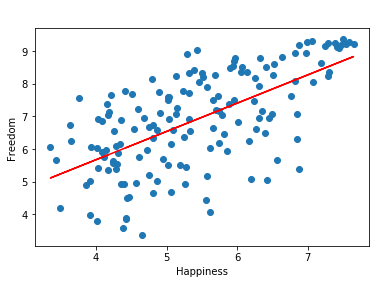

y = 0.87x + 2.21


In [17]:
#create graphic
happiness =free_to_happy.iloc[:,1]
freedom= free_to_happy.iloc[:,2]
(slope, intercept, rvalue, pvalue, stderr) = linregress(happiness, freedom)
regress_values = happiness * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(happiness,freedom)
plt.plot(happiness,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Happiness')
plt.ylabel('Freedom')
plt.show()
print(line_eq)

In [15]:
correlation = st.pearsonr(happiness,freedom)
print(f"The correlation coefficient between happiness and freedom is {round(correlation[0],2)}")

The correlation coefficient between happiness and freedom is 0.63
